# PCA
主成分分析。対象データの次元削減。

In [40]:
%matplotlib inline
from collections import Counter
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
mnist = fetch_mldata('MNIST original')
mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                           mnist.target.astype('int32'), random_state=42)
mnist_X = mnist_X / 255.0
train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y,
                                                    test_size=0.2,
                                                    random_state=43)

### 主成分分析の可視化


In [42]:
# ラベルが0のデータを抽出する。
zero_index_array = []
for i, y in enumerate(train_y):
    if y == 0:
        zero_index_array.append(i)
print(len(zero_index_array))
sample = train_X[zero_index_array]

5534


In [43]:
# scikit-learnのpcaを用いて主成分分析
pca = PCA(n_components = 20)
pca.fit(sample)
comp_sample = pca.transform(sample)
print(comp_sample.shape)

(5534, 20)


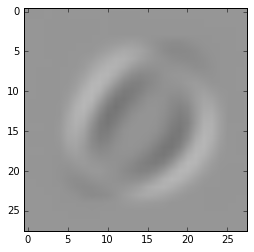

In [44]:
plt.imshow(pca.components_[0].reshape(28,28),vmin=-0.5,vmax=0.5, cmap = cm.Greys_r)